<a href="https://colab.research.google.com/github/sheniabosch/sql_business_exploration/blob/main/ENIAC_CS2_discounts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ENIAC case study 2 - an analyzation of the effects of discounts on sales
by Shenia Bosch 🏷️

# LIBRARY IMPORTS

In [40]:
#import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 100)

# DATA IMPORTS

## Brands

In [41]:
url = 'https://drive.google.com/file/d/1hQYuzL4kAcBhmc9W0RGCC18gWmSwQd_Y/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

## Orderlines

In [42]:
url = 'https://drive.google.com/file/d/1r_5-gNRM_KHYSM-gX_oW9zvmrtG7tT4h/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

## Orders

In [43]:
url = 'https://drive.google.com/file/d/115Dl_6UB7ihGjJh72DwGLjWbmXxGwHrL/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

## Products

In [44]:
url = 'https://drive.google.com/file/d/1kxdI8q15-QiV5n1szbbh05HVDP_NL9b7/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

# DATA EXPORATION

## Brands

In [45]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [46]:
brands.head(5)

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


## Orderlines

In [47]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [48]:
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


Observations:

1. unit_price should be set to float
2. date should be in datetime
3. sku should be set to int
4. product_id column contains nulls

## Orders

In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [50]:
orders.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


Observations:

1. created_date should be in datetime
2. we cannot see what products were sold in the orders

## Products

In [51]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [52]:
products.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


Observations:
1. Price should be set to float
2. Promo_price should be set to float
3. Names and descriptions are lengthy and should be more concise
3. sku should be set to int

# DATA CLEANING

## Brands

## Orderlines

In [53]:
# Clean unit_price: remove dots used as thousands separators, replace commas with dots if needed
orderlines['unit_price'] = (
    orderlines['unit_price']
    .astype(str)
    .str.replace('.', '', regex=False)  # remove thousands separator
    .str.replace(',', '.', regex=False)  # convert decimal comma to dot
)

# Now convert to float
orderlines['unit_price'] = pd.to_numeric(orderlines['unit_price'], errors='coerce')


In [54]:
# Convert unit_price to float
orderlines['unit_price'] = orderlines['unit_price'].astype(float)

# Convert date to datetime
orderlines['date'] = pd.to_datetime(orderlines['date'], errors='coerce')

# Instead of forcing numeric, keep as string for merging
orderlines['sku'] = orderlines['sku'].astype(str).str.strip()
products['sku'] = products['sku'].astype(str).str.strip()



## Orders

In [55]:
# Convert created_date to datetime
orders['created_date'] = pd.to_datetime(orders['created_date'], errors='coerce')

# Drop rows with null created_date or order_id
orders.dropna(subset=['created_date', 'order_id'], inplace=True)

# Remove duplicates
orders.drop_duplicates(inplace=True)

## Products

In [56]:

# Convert price and promo_price to float
products['price'] = pd.to_numeric(products['price'], errors='coerce')
products['promo_price'] = pd.to_numeric(products['promo_price'], errors='coerce')

# Truncate name and desc to shorter form (e.g., first 50 characters)
products['name'] = products['name'].astype(str).str.slice(0, 50)
products['desc'] = products['desc'].astype(str).str.slice(0, 100)

# Drop rows with null SKU or price
products.dropna(subset=['sku', 'price'], inplace=True)

# Remove duplicates
products.drop_duplicates(subset='sku', inplace=True)

for col in ['price', 'promo_price']:
    products[col] = (
        products[col]
        .astype(str)
        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
    )
    products[col] = pd.to_numeric(products[col], errors='coerce')


# DATA MERGES

In [57]:
# Extract brand code from SKU
products['brand_code'] = products['sku'].astype(str).str[:3]

# Merge with brands
products = products.merge(brands, left_on='brand_code', right_on='short', how='left')

# Drop unnecessary columns
products.drop(columns=['short', 'brand_code'], inplace=True)

# Remove duplicates
products.drop_duplicates(inplace=True)


In [58]:
# Merge orderlines with orders to include product info per order
orders_detailed = orderlines.merge(orders, left_on='id_order', right_on='order_id', how='inner')

# Optional: Drop orders that had no products
orders_detailed.dropna(subset=['sku'], inplace=True)

# Remove duplicates
orders_detailed.drop_duplicates(inplace=True)

In [59]:
# Merge orderlines with cleaned products (sku is the key)
orderlines_full = orderlines.merge(products, on='sku', how='left')

# Drop rows where product info couldn't be found
orderlines_full.dropna(subset=['name', 'price'], inplace=True)

# Remove duplicates
orderlines_full.drop_duplicates(inplace=True)

In [60]:
orderlines_clean = orderlines.copy()
products_clean = products.copy()

# Merge orderlines + products
orderlines_merged = orderlines_clean.merge(
    products_clean,
    on='sku',
    how='left'
)

# Check results
print(orderlines_merged.head())
print(orderlines_merged.shape)

        id  id_order  product_id  product_quantity      sku  unit_price  \
0  1119109    299539           0                 1  OTT0133     1899.00   
1  1119110    299540           0                 1  LGE0043    39900.00   
2  1119111    299541           0                 1  PAR0071    47405.00   
3  1119112    299542           0                 1  WDT0315     6839.00   
4  1119113    299543           0                 1  JBL0104     2374.00   

                 date                                               name  \
0 2017-01-01 00:07:19  Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...   
1 2017-01-01 00:19:45         27UD58-B LG Monitor 27 "4K UHD DisplayPort   
2 2017-01-01 00:20:57  Parrot Bebop 2 White + Command FLYPAD and FPV ...   
3 2017-01-01 00:51:40              Blue WD 2TB Hard Drive 35 "Mac and PC   
4 2017-01-01 01:06:38                      Gray Bluetooth Speaker JBL GO   

                                                desc   price  promo_price  \
0  resistant co

# CLEAN DATA

In [61]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [62]:
brands.head()

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


In [63]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  float64       
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 15.7+ MB


In [64]:
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,1899.00,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,39900.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,47405.00,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,6839.00,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,2374.00,2017-01-01 01:06:38


In [65]:
orderlines_merged.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,long
0,1119109,299539,0,1,OTT0133,1899.00,2017-01-01 00:07:19,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,3499.00,199904.00,0.00,11865403,Otterbox
1,1119110,299540,0,1,LGE0043,39900.00,2017-01-01 00:19:45,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,4290.00,NaN,0.00,1296,LG
2,1119111,299541,0,1,PAR0071,47405.00,2017-01-01 00:20:57,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,6990.00,NaN,0.00,11905404,Parrot
3,1119112,299542,0,1,WDT0315,6839.00,2017-01-01 00:51:40,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,790.00,639945.00,0.00,12655397,Western Digital
4,1119113,299543,0,1,JBL0104,2374.00,2017-01-01 01:06:38,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,299.00,2799.00,1.00,5398,JBL


In [66]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [67]:
orders.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


In [68]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10157 entries, 0 to 10156
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          10157 non-null  object 
 1   name         10157 non-null  object 
 2   desc         10157 non-null  object 
 3   price        10157 non-null  int64  
 4   promo_price  5836 non-null   float64
 5   in_stock     10157 non-null  int64  
 6   type         10110 non-null  object 
 7   long         9961 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 634.9+ KB


In [69]:
products.head()

,sku,name,desc,price,promo_price,in_stock,type,long
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,5999,499899.00,1,8696,Rain Design
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,590,589996.00,0,13855401,Apple
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,590,569898.00,0,1387,Apple
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,250,229997.00,0,1230,Apple
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,3499,3199.00,1,1364,Kingston


# ANALYZATION


# **Positive Effects of Discounts:**

Increased Sales Volume: Discounts often lead to a surge in the quantity of products sold. Consumers are more likely to make a purchase when they perceive a good deal, especially for non-essential items or products they were considering buying.

Revenue Boost (Short-Term): While individual profit margins per unit might decrease, the increased volume of sales can lead to a higher overall revenue, particularly if the demand is elastic (i.e., sensitive to price changes). The "Revenue Contribution" pie chart would show the proportion of revenue generated by discounted items, which is often substantial.

Customer Acquisition: Discounts can attract new customers who might be hesitant to try a product at full price. Once acquired, these customers might become repeat buyers, even at regular prices.

Inventory Clearance: Discounts are effective tools for clearing out excess or slow-moving inventory, preventing obsolescence and freeing up warehouse space. The "Sales by Category and Discount Status" bar chart might highlight categories where discounts are frequently used for this purpose.

Increased Foot Traffic/Website Visits: Promotions can drive more people to physical stores or e-commerce websites, increasing the chances of impulse purchases of non-discounted items as well.

Competitive Advantage: Strategic discounting can help a business gain market share or respond to competitors' pricing strategies.


# **Negative Effects of Discounts:**

Reduced Profit Margins: The most direct negative effect is the reduction in profit per unit sold. If the increase in sales volume doesn't compensate for this reduction, overall profitability can suffer.

Brand Devaluation: Frequent or deep discounting can devalue a brand in the eyes of consumers, making them perceive products as less premium or worth their full price. This can be particularly damaging for luxury or high-end brands.

Training Customers to Wait for Discounts: Consumers might learn to anticipate sales periods and postpone their purchases, leading to diminished sales during non-discounted periods. The "Total Revenue and Discounted Revenue Over Time" line plot might show spikes during discount periods and dips otherwise.

Cannibalization of Full-Price Sales: Customers who would have bought the product at full price might now wait for a discount, thereby eating into potential full-price revenue. The "Sales Volume by Discount Status" and "Average Unit Price by Discount Status" plots would illustrate this trade-off.
Operational Strain: A sudden surge in discounted sales can strain logistics, customer service, and fulfillment operations.


# **Timing of Discounts:**

The timing of discounts plays a crucial role in their effectiveness.

Seasonal Trends: Discounts often align with seasonal events (e.g., holiday sales, end-of-season clearance) or specific shopping days (e.g., Black Friday, Cyber Monday). The "Total Revenue and Discounted Revenue Over Time" plot could reveal such seasonal patterns.

Day of the Week/Hour of Day:

Day of the Week: Discounts might be more effective on certain days, such as weekends when people have more leisure time to shop, or specific weekdays for online promotions. The "Sales Volume by Day of the Week and Discount Status" bar chart would highlight if discounts are more prevalent or effective on certain days.

Hour of Day: For online sales, certain hours might show higher engagement with discounts, perhaps during lunch breaks or evening hours. The "Revenue by Hour of Day and Discount Status" line plot would illustrate how discounted sales perform throughout the day compared to regular sales.

Product Life Cycle: Discounts are often used to boost sales of new products for a short period (introductory offers) or to clear out products nearing the end of their life cycle.

Competitor Activity: Businesses may time their discounts in response to competitor promotions to remain competitive.

# PLOTS

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set display options for better readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 100)

# --- DATA IMPORTS ---
# Note: In a live environment, ensure these URLs are accessible.
url_brands = 'https://drive.google.com/file/d/1hQYuzL4kAcBhmc9W0RGCC18gWmSwQd_Y/view?usp=drive_link'
path_brands = 'https://drive.google.com/uc?export=download&id=' + url_brands.split('/')[-2]
brands = pd.read_csv(path_brands)

url_orderlines = 'https://drive.google.com/file/d/1r_5-gNRM_KHYSM-gX_oW9zvmrtG7tT4h/view?usp=drive_link'
path_orderlines = 'https://drive.google.com/uc?export=download&id=' + url_orderlines.split('/')[-2]
orderlines = pd.read_csv(path_orderlines)

url_orders = 'https://drive.google.com/file/d/115Dl_6UB7ihGjJh72DwGLjWbmXxGwHrL/view?usp=drive_link'
path_orders = 'https://drive.google.com/uc?export=download&id=' + url_orders.split('/')[-2]
orders = pd.read_csv(path_orders)

url_products = 'https://drive.google.com/file/d/1kxdI8q15-QiV5n1szbbh05HVDP_NL9b7/view?usp=drive_link'
path_products = 'https://drive.google.com/uc?export=download&id=' + url_products.split('/')[-2]
products = pd.read_csv(path_products)

# --- DATA CLEANING ---

# Orderlines Cleaning
orderlines['unit_price'] = (
    orderlines['unit_price']
    .astype(str)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
)
orderlines['unit_price'] = pd.to_numeric(orderlines['unit_price'], errors='coerce')
orderlines['unit_price'] = orderlines['unit_price'].astype(float)
orderlines['date'] = pd.to_datetime(orderlines['date'], errors='coerce')
orderlines['sku'] = orderlines['sku'].astype(str).str.strip()

# Orders Cleaning
orders['created_date'] = pd.to_datetime(orders['created_date'], errors='coerce')
orders.dropna(subset=['created_date', 'order_id'], inplace=True)
orders.drop_duplicates(inplace=True)

# Products Cleaning
products['price'] = pd.to_numeric(products['price'], errors='coerce')
products['promo_price'] = pd.to_numeric(products['promo_price'], errors='coerce')
products['name'] = products['name'].astype(str).str.slice(0, 50)
products['desc'] = products['desc'].astype(str).str.slice(0, 100)
products['sku'] = products['sku'].astype(str).str.strip()
products.dropna(subset=['sku', 'price'], inplace=True)
products.drop_duplicates(subset='sku', inplace=True)

# Re-clean price and promo_price as per notebook, though pd.to_numeric handles this often.
for col in ['price', 'promo_price']:
    products[col] = (
        products[col]
        .astype(str)
        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
    )
    products[col] = pd.to_numeric(products[col], errors='coerce')

# --- DATA MERGES ---

# Extract brand code from SKU
products['brand_code'] = products['sku'].astype(str).str[:3]

# Merge with brands
products = products.merge(brands, left_on='brand_code', right_on='short', how='left')

# Drop unnecessary columns
products.drop(columns=['short', 'brand_code'], inplace=True)

# Remove duplicates
products.drop_duplicates(inplace=True)

# Merge orderlines with orders to include product info per order (orders_detailed might not be strictly needed for this analysis, but keeping for consistency with notebook)
orders_detailed = orderlines.merge(orders, left_on='id_order', right_on='order_id', how='inner')
orders_detailed.dropna(subset=['sku'], inplace=True)
orders_detailed.drop_duplicates(inplace=True)

# Create clean copies for the final merge as per notebook's last merge step
orderlines_clean = orderlines.copy()
products_clean = products.copy()

# Merge orderlines + products to create orderlines_merged
orderlines_merged = orderlines_clean.merge(
    products_clean,
    on='sku',
    how='left'
)

# Drop rows where product info couldn't be found (due to left merge)
orderlines_merged.dropna(subset=['name', 'price'], inplace=True)

# Remove duplicates
orderlines_merged.drop_duplicates(inplace=True)

print("Orderlines Merged head after re-creation:")
print(orderlines_merged.head())
print("\nOrderlines Merged info after re-creation:")
orderlines_merged.info()

# --- DATA PREPARATION FOR ANALYSIS ---
# Calculate discount_amount and is_discounted
orderlines_merged['discount_amount_per_item'] = orderlines_merged['price'] - orderlines_merged['promo_price']
orderlines_merged['is_discounted'] = orderlines_merged['promo_price'] < orderlines_merged['price']

# Calculate revenue for each order line.
# Using 'product_quantity' as identified from the DataFrame info.
orderlines_merged['revenue'] = orderlines_merged['product_quantity'] * orderlines_merged['unit_price']

# Extract time features from the 'date' column (from orderlines)
orderlines_merged['order_date'] = pd.to_datetime(orderlines_merged['date'], errors='coerce')
orderlines_merged['year_month'] = orderlines_merged['order_date'].dt.to_period('M')
orderlines_merged['day_of_week'] = orderlines_merged['order_date'].dt.day_name()
orderlines_merged['hour_of_day'] = orderlines_merged['order_date'].dt.hour

print("\nOrderlines Merged with new features (after re-creation):")
print(orderlines_merged.head())



Orderlines Merged head after re-creation:
        id  id_order  product_id  product_quantity      sku  unit_price  \
0  1119109    299539           0                 1  OTT0133     1899.00   
1  1119110    299540           0                 1  LGE0043    39900.00   
2  1119111    299541           0                 1  PAR0071    47405.00   
3  1119112    299542           0                 1  WDT0315     6839.00   
4  1119113    299543           0                 1  JBL0104     2374.00   

                 date                                               name  \
0 2017-01-01 00:07:19  Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...   
1 2017-01-01 00:19:45         27UD58-B LG Monitor 27 "4K UHD DisplayPort   
2 2017-01-01 00:20:57  Parrot Bebop 2 White + Command FLYPAD and FPV ...   
3 2017-01-01 00:51:40              Blue WD 2TB Hard Drive 35 "Mac and PC   
4 2017-01-01 01:06:38                      Gray Bluetooth Speaker JBL GO   

                                                de

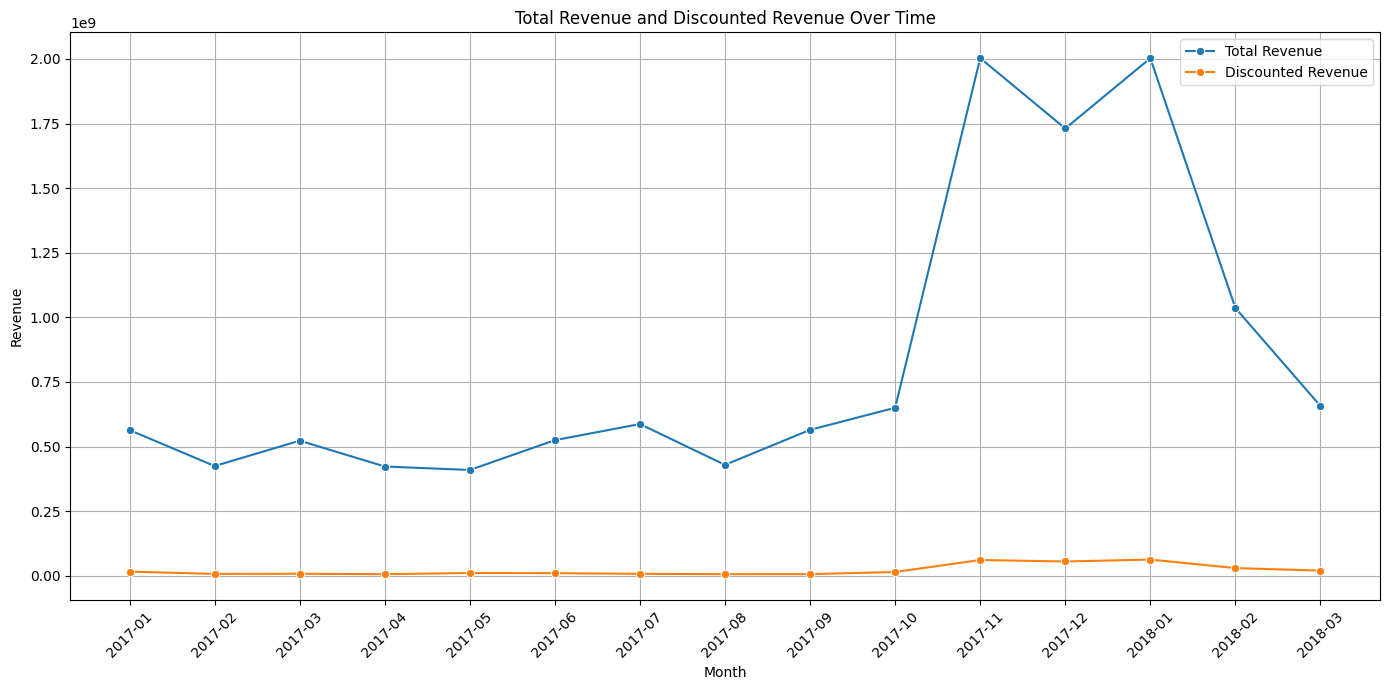

<ipython-input-80-f9d959e6bdeb>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_volume_by_discount, x='is_discounted', y='product_quantity', palette='viridis')


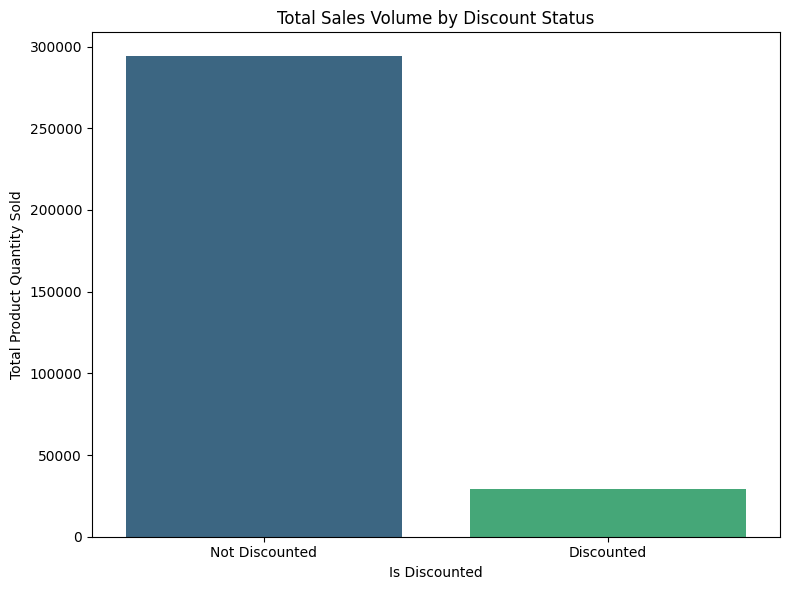

<ipython-input-80-f9d959e6bdeb>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_discount, x='is_discounted', y='unit_price', palette='cividis')


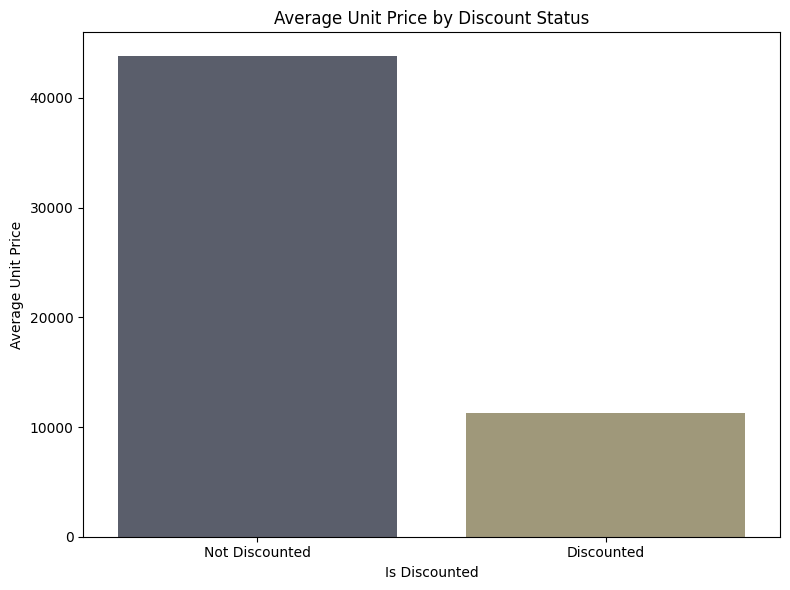

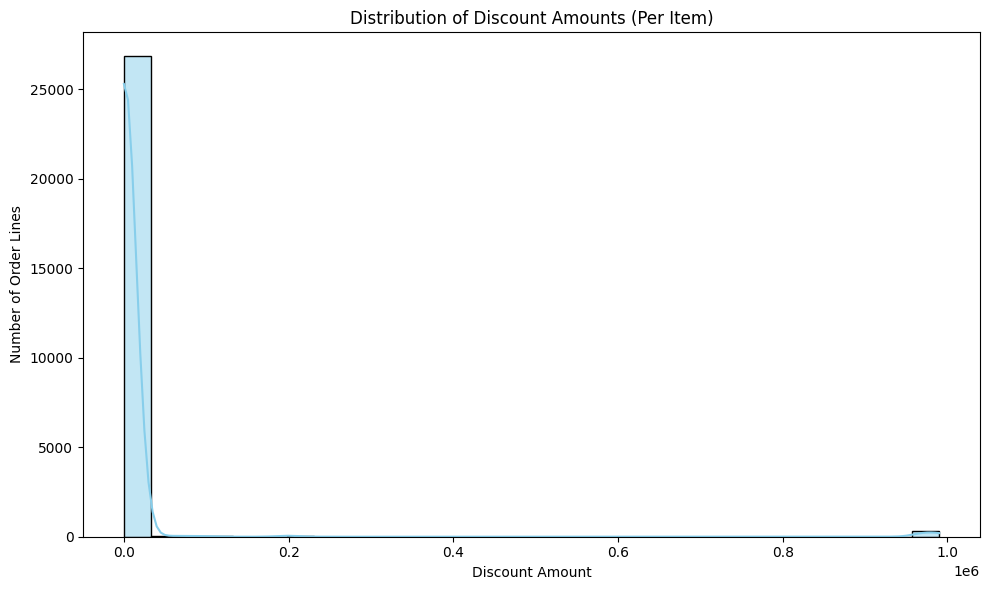

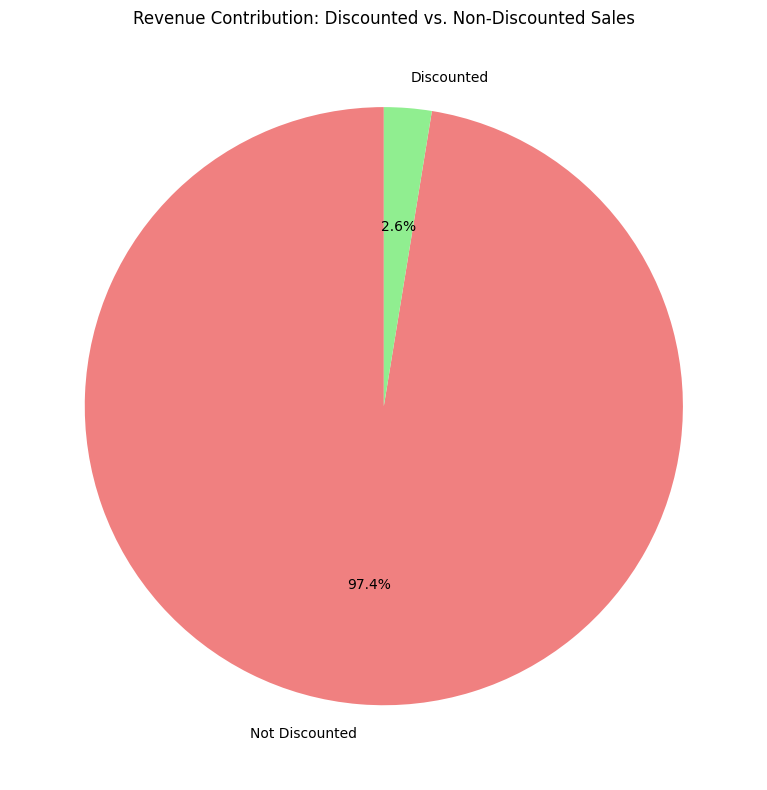

<Figure size 1600x800 with 0 Axes>

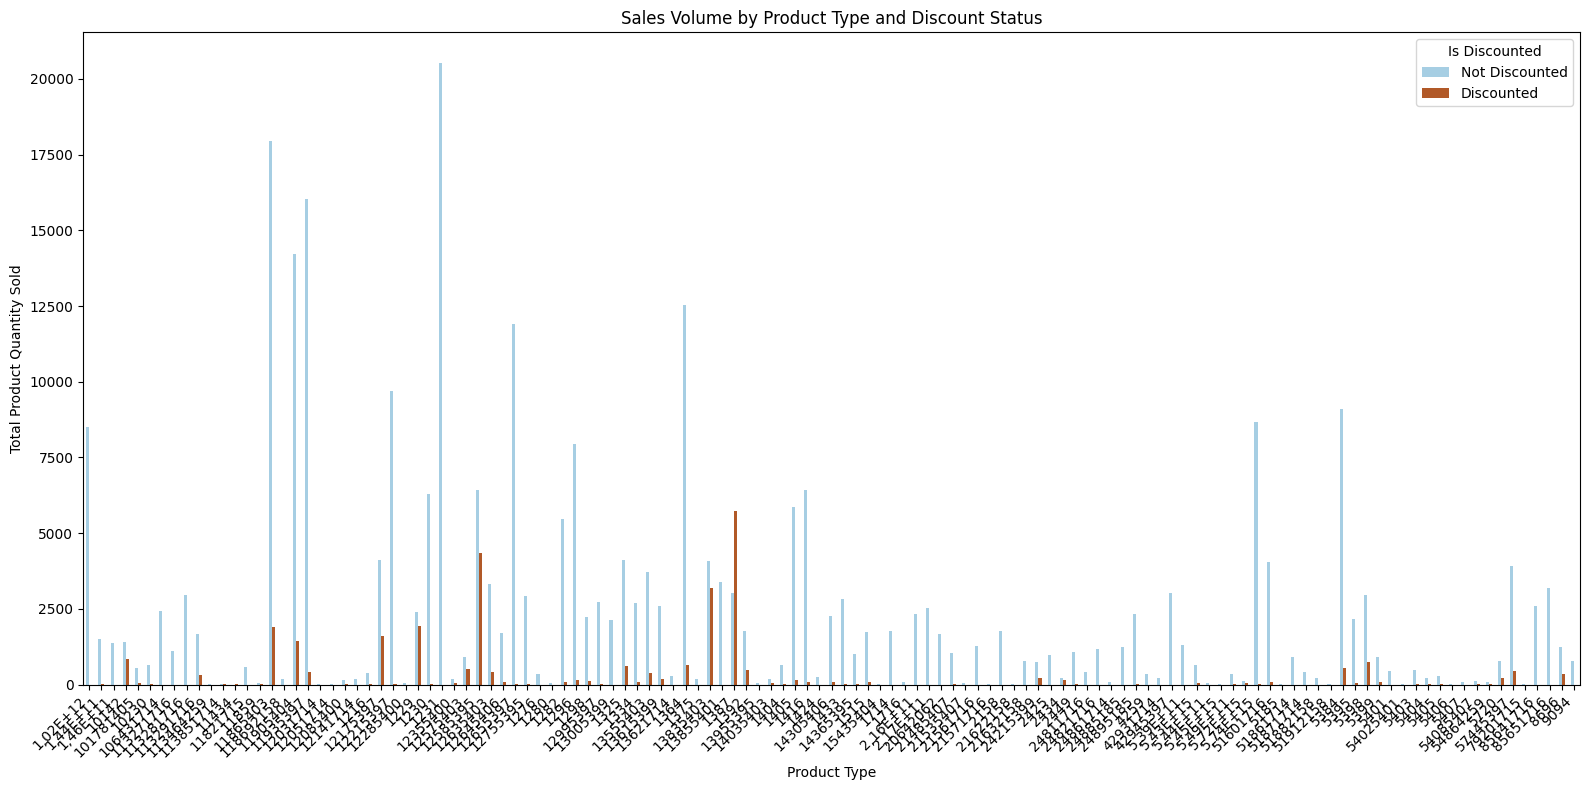

<Figure size 1200x700 with 0 Axes>

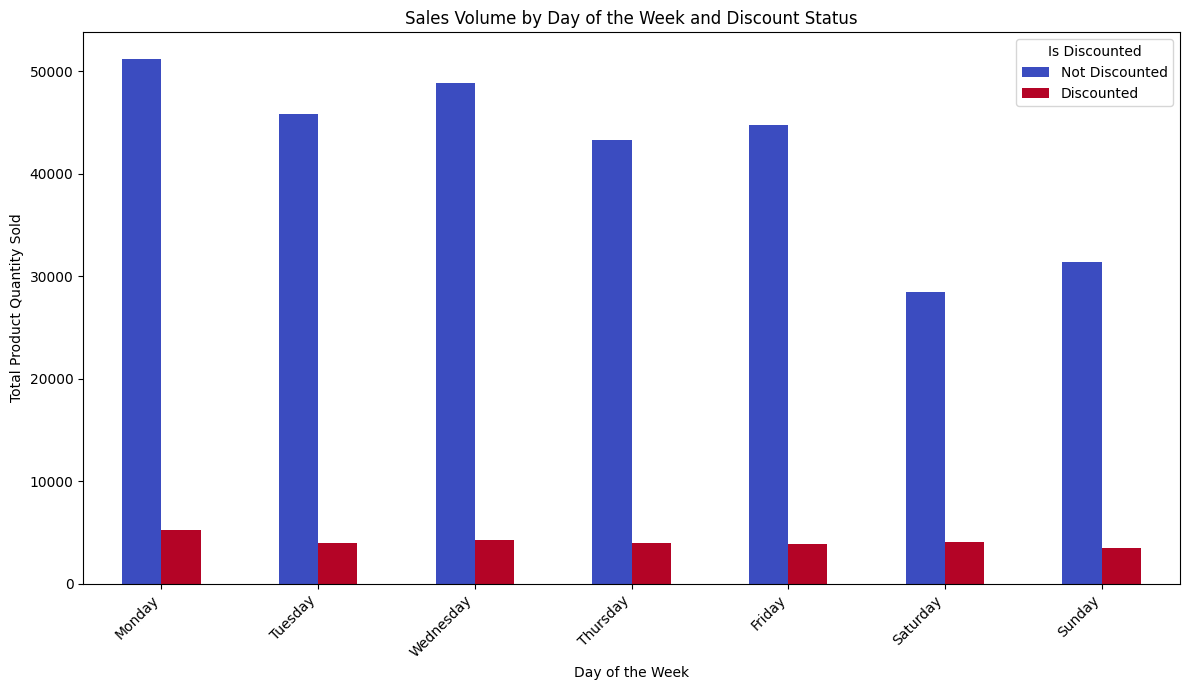

<Figure size 1200x700 with 0 Axes>

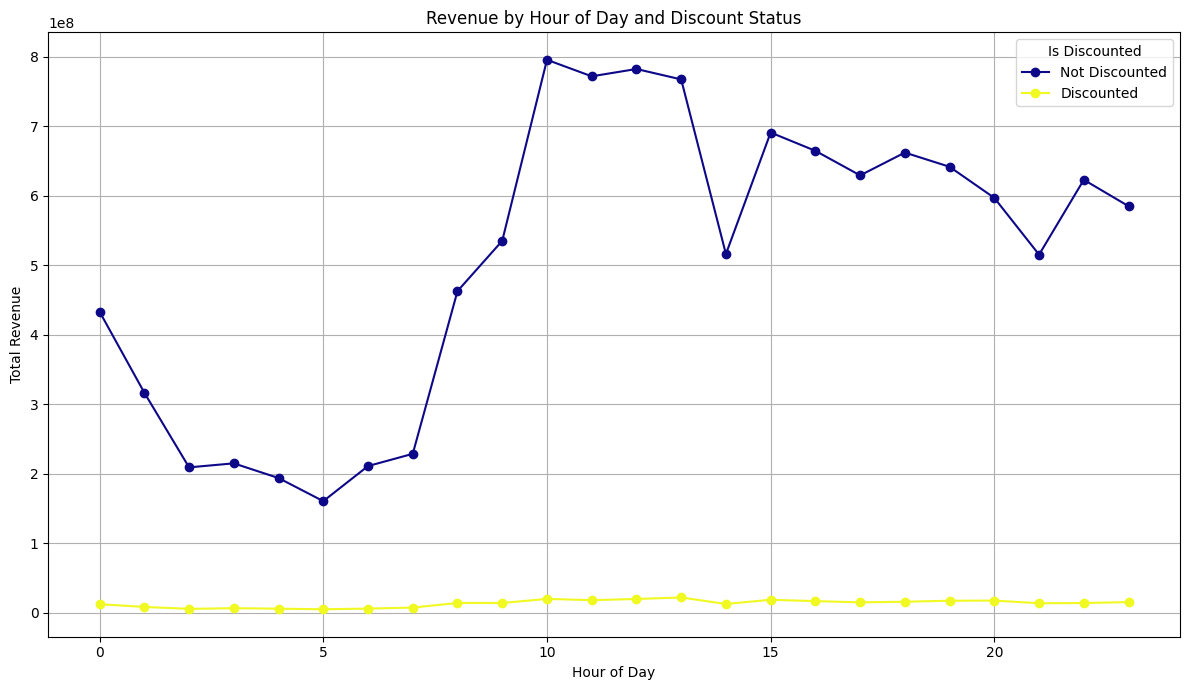

In [80]:
# --- SEABORN PLOT OPTIONS ---

# Plot 1: Total Revenue and Discounted Revenue Over Time (Monthly)
plt.figure(figsize=(14, 7))
monthly_revenue = orderlines_merged.groupby('year_month')['revenue'].sum().reset_index()
discounted_monthly_revenue = orderlines_merged[orderlines_merged['is_discounted']].groupby('year_month')['revenue'].sum().reset_index()

monthly_revenue['year_month'] = monthly_revenue['year_month'].astype(str)
discounted_monthly_revenue['year_month'] = discounted_monthly_revenue['year_month'].astype(str)

sns.lineplot(data=monthly_revenue, x='year_month', y='revenue', marker='o', label='Total Revenue')
sns.lineplot(data=discounted_monthly_revenue, x='year_month', y='revenue', marker='o', label='Discounted Revenue')
plt.title('Total Revenue and Discounted Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Sales Volume (product_quantity) by Discount Status
plt.figure(figsize=(8, 6))
sales_volume_by_discount = orderlines_merged.groupby('is_discounted')['product_quantity'].sum().reset_index()
sns.barplot(data=sales_volume_by_discount, x='is_discounted', y='product_quantity', palette='viridis')
plt.title('Total Sales Volume by Discount Status')
plt.xlabel('Is Discounted')
plt.ylabel('Total Product Quantity Sold')
plt.xticks(ticks=[0, 1], labels=['Not Discounted', 'Discounted'])
plt.tight_layout()
plt.show()

# Plot 3: Average Unit Price by Discount Status
plt.figure(figsize=(8, 6))
avg_price_by_discount = orderlines_merged.groupby('is_discounted')['unit_price'].mean().reset_index()
sns.barplot(data=avg_price_by_discount, x='is_discounted', y='unit_price', palette='cividis')
plt.title('Average Unit Price by Discount Status')
plt.xlabel('Is Discounted')
plt.ylabel('Average Unit Price')
plt.xticks(ticks=[0, 1], labels=['Not Discounted', 'Discounted'])
plt.tight_layout()
plt.show()

# Plot 4: Distribution of Discount Amounts (for discounted items only)
discounted_items = orderlines_merged[orderlines_merged['is_discounted']]
if not discounted_items.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(discounted_items['discount_amount_per_item'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Discount Amounts (Per Item)')
    plt.xlabel('Discount Amount')
    plt.ylabel('Number of Order Lines')
    plt.tight_layout()
    plt.show()
else:
    print("No discounted items found to plot discount amount distribution.")

# Plot 5: Revenue Contribution of Discounted vs. Non-Discounted Sales
plt.figure(figsize=(8, 8))
revenue_contribution = orderlines_merged.groupby('is_discounted')['revenue'].sum()
revenue_contribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'], labels=['Not Discounted', 'Discounted'])
plt.title('Revenue Contribution: Discounted vs. Non-Discounted Sales')
plt.ylabel('') # Hide the default 'revenue' label on y-axis for pie chart
plt.tight_layout()
plt.show()

# Plot 6: Sales by Type (Category) and Discount Status
plt.figure(figsize=(16, 8))
# Using 'type' column instead of 'category' as per DataFrame info
sales_by_type_discount = orderlines_merged.groupby(['type', 'is_discounted'])['product_quantity'].sum().unstack(fill_value=0)
sales_by_type_discount.plot(kind='bar', figsize=(16, 8), colormap='Paired')
plt.title('Sales Volume by Product Type and Discount Status')
plt.xlabel('Product Type')
plt.ylabel('Total Product Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Discounted', labels=['Not Discounted', 'Discounted'])
plt.tight_layout()
plt.show()

# Plot 7: Sales Volume by Day of the Week and Discount Status
plt.figure(figsize=(12, 7))
sales_by_day_discount = orderlines_merged.groupby(['day_of_week', 'is_discounted'])['product_quantity'].sum().unstack(fill_value=0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_discount = sales_by_day_discount.reindex(day_order)
sales_by_day_discount.plot(kind='bar', figsize=(12, 7), colormap='coolwarm')
plt.title('Sales Volume by Day of the Week and Discount Status')
plt.xlabel('Day of the Week')
plt.ylabel('Total Product Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Discounted', labels=['Not Discounted', 'Discounted'])
plt.tight_layout()
plt.show()

# Plot 8: Revenue by Hour of Day and Discount Status
plt.figure(figsize=(12, 7))
revenue_by_hour_discount = orderlines_merged.groupby(['hour_of_day', 'is_discounted'])['revenue'].sum().unstack(fill_value=0)
revenue_by_hour_discount.plot(kind='line', figsize=(12, 7), marker='o', colormap='plasma')
plt.title('Revenue by Hour of Day and Discount Status')
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.legend(title='Is Discounted', labels=['Not Discounted', 'Discounted'])
plt.grid(True)
plt.tight_layout()
plt.show()